In [1]:
import datetime
from datetime import date
from datetime import datetime
import requests
import pprint
from bs4 import BeautifulSoup
import pandas as pd
import re
import pickle
from urllib.request import urlopen
import glob
import altair as alt
import time
import itertools
import numpy as np
import operator
from datetime import timedelta
from ipywidgets import interact, IntSlider
from IPython.display import display
import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
# import seaborn as sns
# from matplotlib import pyplot as plt
# %matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler

from pycaret.classification import * 

# pd.options.display.max_columns = 5000
# pd.options.display.max_rows = 5000

injured_pred = 'injured_in_12_week'

simple_features = ['Height', 'Weight', 'age','cum_injury_total', 'weeks_since_last_injury', 'Min_cum','Serie A_cum',
 'Premier League_cum', 'La Liga_cum', 'Ligue 1_cum', 'Bundesliga_cum', 'Champions Lg_cum', 'Europa Lg_cum', 'FIFA World Cup_cum', 'UEFA Nations League_cum', 'UEFA Euro_cum',
 'Copa América_cum', 'Away_cum', 'Home_cum', 'Neutral_cum']

extended_features = ['Height', 'Weight', 'defender', 'attacker', 'midfielder', 'goalkeeper', 'right_foot', 'age', 'cum_injury_total', 'weeks_since_last_injury', 'Min_cum', 'Gls_cum', 'Ast_cum', 'PK_cum', 'PKatt_cum',
 'Sh_cum', 'SoT_cum', 'CrdY_cum', 'CrdR_cum', 'Touches_cum', 'Press_cum', 'Tkl_cum', 'Int_cum', 'Blocks_cum', 'xG_cum', 'npxG_cum', 'xA_cum', 'SCA_cum', 'GCA_cum', 'Cmp_cum',
 'Att_cum', 'Prog_cum', 'Carries_cum', 'Prog.1_cum', 'Succ_cum', 'Att.1_cum', 'Fls_cum', 'Fld_cum', 'Off_cum', 'Crs_cum', 'TklW_cum', 'OG_cum', 'PKwon_cum','PKcon_cum', 'Serie A_cum',
 'Premier League_cum', 'La Liga_cum', 'Ligue 1_cum', 'Bundesliga_cum', 'Champions Lg_cum', 'Europa Lg_cum', 'FIFA World Cup_cum', 'UEFA Nations League_cum', 'UEFA Euro_cum',
 'Copa América_cum', 'Away_cum', 'Home_cum', 'Neutral_cum']

/usr/local/lib/python3.6/dist-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
# Load Dataset

# Renzo's Path
# dataset = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/complete_final_df_5.csv')

# Sravan's Path
# dataset = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/dataset_for_model_final.csv')

# Sravan's Parquet Path
dataset = pd.read_parquet('dataframes_blog/dataset_for_model_final.parquet') 

In [3]:
# dataset[dataset['FBRefID']=='dea698d9'].to_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/ronaldo.csv', index=False)
dataset = dataset[dataset['drop'] == 0]
dataset = dataset[dataset['goalkeeper'] == 0]

In [4]:
# Get Train Test Split
df_train = dataset[dataset['cum_week'] <= dataset["train_split"]].dropna()
df_test = dataset[dataset['cum_week'] > dataset["train_split"]].dropna()

In [5]:
X_train = df_train[extended_features]
y_train = df_train[injured_pred]

X_test = df_test[extended_features]
y_test = df_test[injured_pred]

In [6]:
exp_clf = setup(dataset[extended_features + [injured_pred]], target=injured_pred, fix_imbalance=True, feature_selection=True, fold=2, fold_strategy='timeseries')

,Description,Value
0,session_id,945
1,Target,injured_in_12_week
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(1604775, 59)"
5,Missing Values,True
6,Numeric Features,53
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
set_config('X_train', X_train)
set_config('X_test', X_test)
set_config('y_train', y_train)
set_config('y_test', y_test)

In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9394,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.2400
rf,Random Forest Classifier,0.9206,0.5863,0.0348,0.0912,0.0502,0.0175,0.0197,22.8600
lightgbm,Light Gradient Boosting Machine,0.9127,0.6350,0.0879,0.1469,0.1076,0.0654,0.0687,21.0650
et,Extra Trees Classifier,0.8931,0.5869,0.0759,0.0830,0.0793,0.0227,0.0227,22.4050
ridge,Ridge Classifier,0.8434,0.0000,0.2470,0.1189,0.1605,0.0856,0.0927,5.0950
lda,Linear Discriminant Analysis,0.8434,0.6317,0.2470,0.1189,0.1605,0.0856,0.0927,11.7150
gbc,Gradient Boosting Classifier,0.8344,0.6682,0.2907,0.1259,0.1756,0.0994,0.1102,424.8200
svm,SVM - Linear Kernel,0.8322,0.0000,0.2493,0.1095,0.1507,0.0735,0.0819,158.6850
dt,Decision Tree Classifier,0.7871,0.5134,0.2022,0.0696,0.1034,0.0146,0.0171,27.9150
ada,Ada Boost Classifier,0.7528,0.6560,0.4271,0.1086,0.1731,0.0846,0.1125,108.2350


In [9]:
# df = pull()
# df.to_csv('results_1_year.csv', index=False)
df = pull().sort_values(by=['F1'], ascending=False)

In [10]:
# Select best model
model = create_model(df.index[0], fold=10)
save_model(model, 'model_1_quarter')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8107,0.6556,0.3094,0.1054,0.1573,0.0788,0.0935
1,0.8245,0.6675,0.3161,0.1268,0.1809,0.1024,0.1159
2,0.8330,0.6878,0.3063,0.1305,0.1830,0.1065,0.1186
3,0.8162,0.6564,0.3204,0.1194,0.1739,0.0942,0.1089
4,0.8479,0.6562,0.2524,0.1195,0.1622,0.0902,0.0978
5,0.8516,0.6652,0.2597,0.1313,0.1744,0.1025,0.1097
6,0.8457,0.6757,0.2904,0.1342,0.1836,0.1109,0.1211
7,0.8380,0.6767,0.2904,0.1256,0.1754,0.1009,0.1119
8,0.8313,0.6744,0.2872,0.1274,0.1765,0.0978,0.1079
9,0.8378,0.6774,0.3108,0.1395,0.1925,0.1166,0.1283


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='injured_in_12_week',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 n...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
           

In [11]:
tuned_model = tune_model(model, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7344,0.6552,0.4500,0.1040,0.1689,0.0792,0.1097
1,0.7233,0.6655,0.4877,0.1086,0.1777,0.0860,0.1216
Mean,0.7288,0.6604,0.4689,0.1063,0.1733,0.0826,0.1156
SD,0.0056,0.0051,0.0189,0.0023,0.0044,0.0034,0.0059


In [14]:
# clf = tuned_model.set_params(class_weight='balanced')
clf = tuned_model
save_model(clf, 'model_1_quarter_tuned')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='injured_in_12_week',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 n...
                                             learning_rate=0.4, loss='deviance',
                                             max_depth=1, max_features='log2',
                                             max_leaf_nodes=None,
         

In [15]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_train, clf.predict(X_train), average='macro'))

print(recall_score(y_test, y_pred, average='macro'))
print(recall_score(y_train, clf.predict(X_train), average='macro'))

print(precision_score(y_test, y_pred, average='macro'))
print(precision_score(y_train, clf.predict(X_train), average='macro'))

0.4745883391281297
0.48471651800959015
0.4997484688657534
0.5001594643910561
0.47042190743329954
0.8030578002823421


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


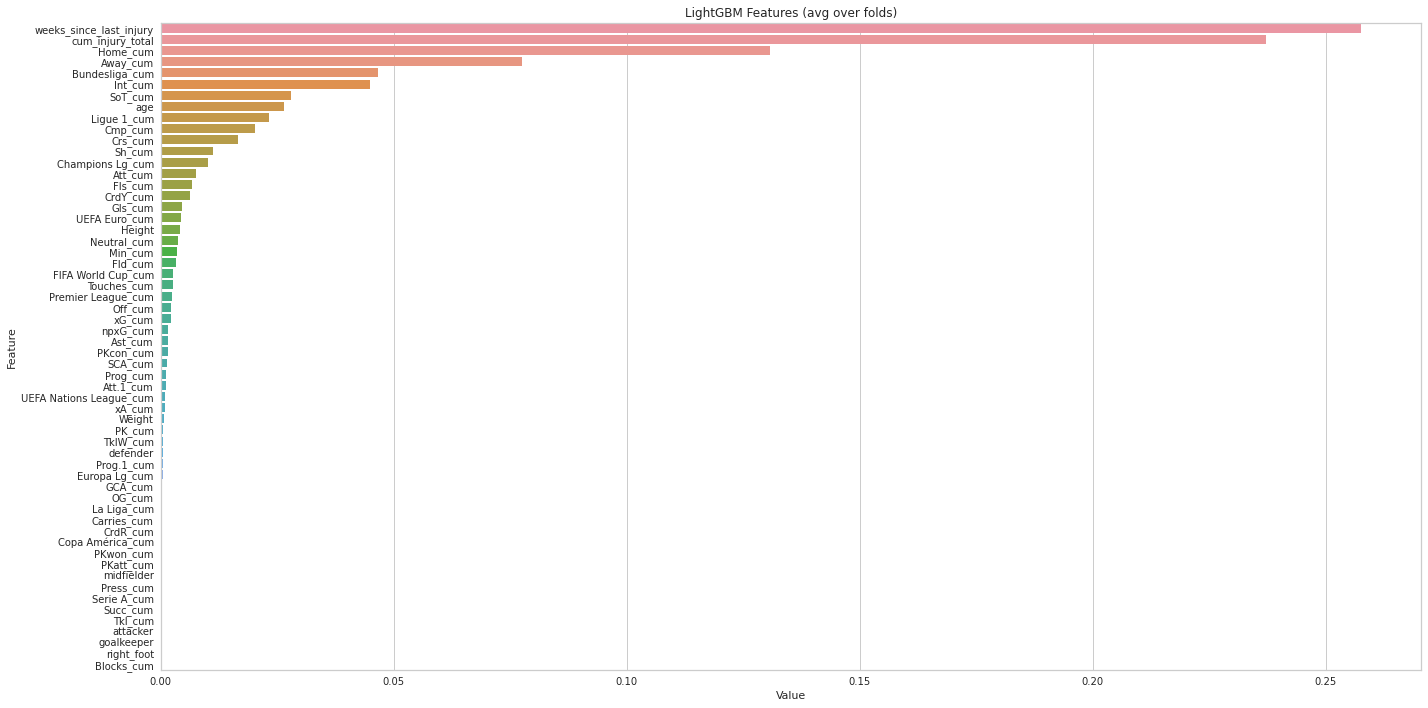

<Figure size 576x396 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [17]:
interpret_model(clf)

TypeError: This function only supports tree based models for binary classification: et, dt, rf, lightgbm.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


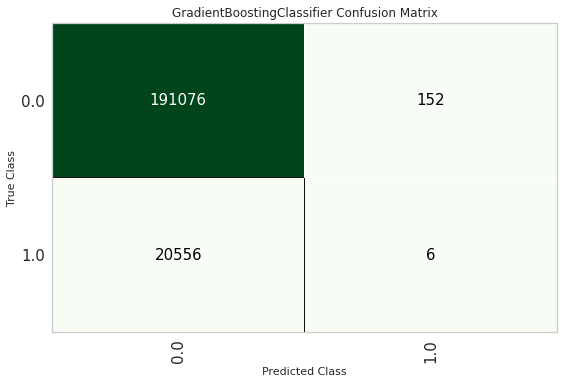

In [18]:
plot_model(clf,'confusion_matrix')

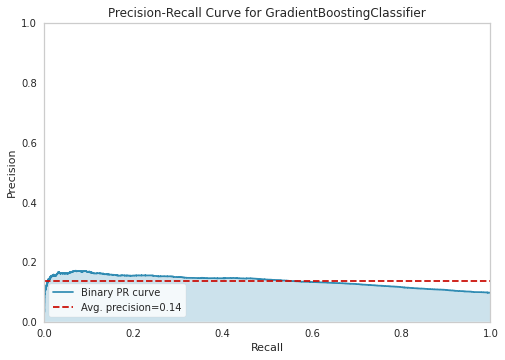

In [19]:
plot_model(clf,'pr')

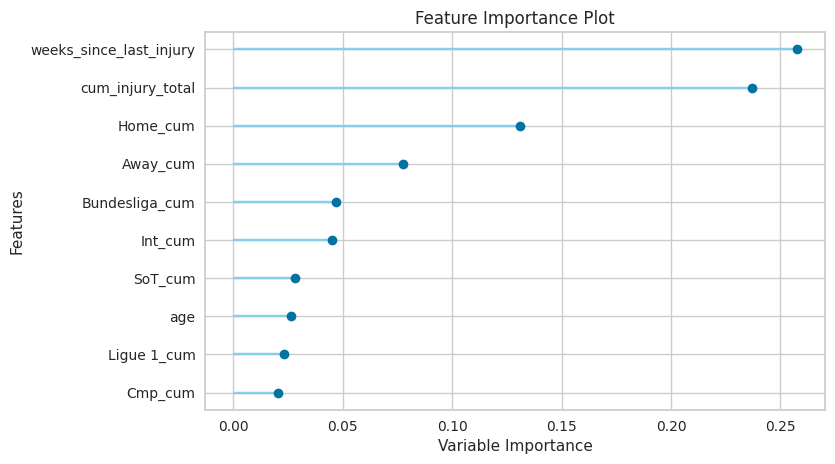

In [20]:
plot_model(clf,'feature')

In [21]:
plot_model(clf,'parameter')

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.4
loss,deviance
max_depth,1
max_features,log2
max_leaf_nodes,None
min_impurity_decrease,0.1
min_impurity_split,None


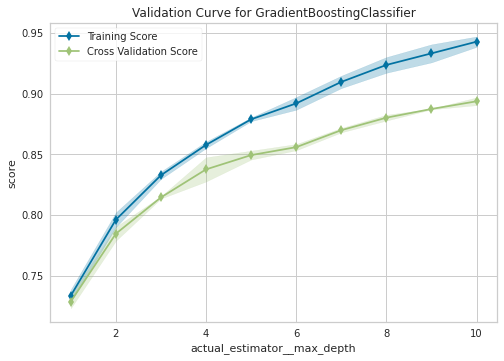

In [22]:
plot_model(clf,'vc')

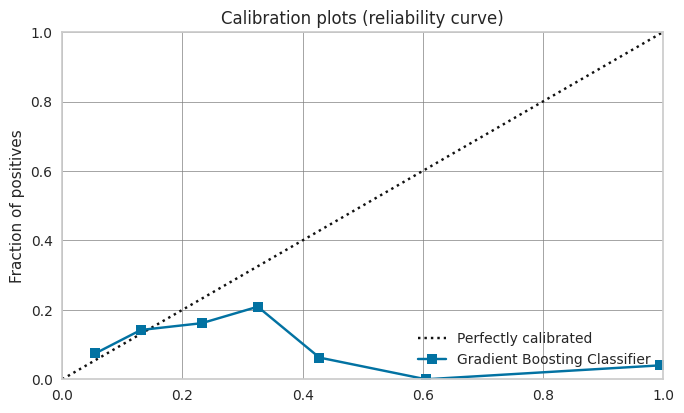

In [23]:
plot_model(clf,'calibration')

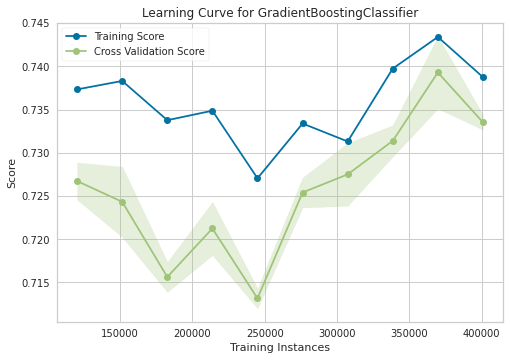

In [24]:
plot_model(clf,'learning')

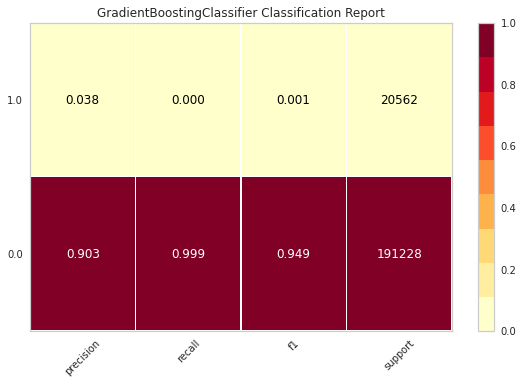

In [25]:
plot_model(clf,'class_report')

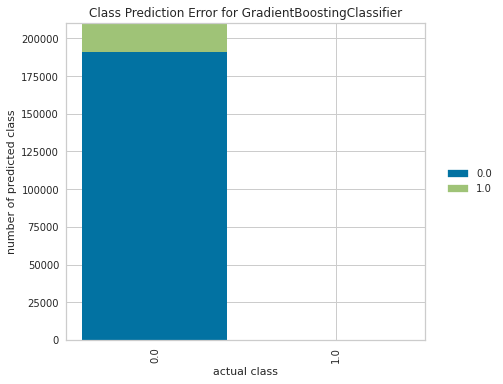

In [27]:
plot_model(clf,'error')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


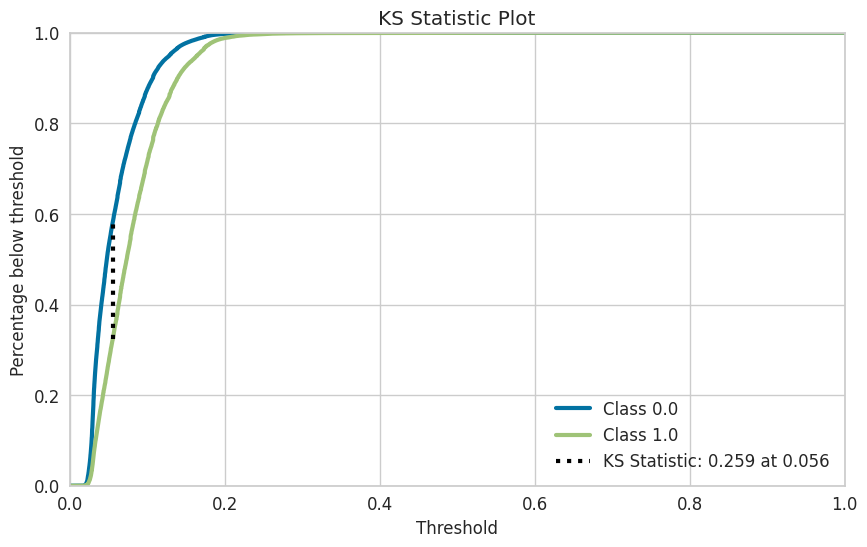

In [28]:
plot_model(clf, plot='ks')

In [ ]:
plot_model(clf, plot='threshold')

IntProgress(value=0, description='Processing: ', max=5)

In [6]:
# Loading the saved model
model_1_quarter_tuned = load_model('model_1_quarter_tuned')

Transformation Pipeline and Model Successfully Loaded


In [4]:
model_1_quarter_tuned

Pipeline(steps=[('dtypes',
                 DataTypes_Auto_infer(ml_usecase='classification',
                                      target='injured_in_12_week')),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels_in_TestData(replacement_strategy='least '
                                                                         'fr...
                ('clean_names', Clean_Colum_Names()),
                ('feature_select',
                 Advanced_Feature_Selection_Classic(n_jobs=-1,
                                                    random_state=6192,
                                                    subclass='binary',
                  

In [7]:
# Cleaning NaNs

dataset_no_nans = dataset.fillna(0)


In [8]:
# Choosing the features we are going to use

dataset_to_predict = dataset_no_nans[['Height', 'Weight', 'defender', 'attacker', 'midfielder', 'goalkeeper', 'right_foot', 'age', 'cum_injury_total', \
    'weeks_since_last_injury', 'Min_cum', 'Gls_cum', 'Ast_cum', 'PK_cum', 'PKatt_cum', 'Sh_cum', 'SoT_cum', 'CrdY_cum', 'CrdR_cum', \
    'Touches_cum', 'Press_cum', 'Tkl_cum', 'Int_cum', 'Blocks_cum', 'xG_cum', 'npxG_cum', 'xA_cum', 'SCA_cum', 'GCA_cum', 'Cmp_cum', 'Att_cum', \
    'Prog_cum', 'Carries_cum', 'Prog.1_cum', 'Succ_cum', 'Att.1_cum', 'Fls_cum', 'Fld_cum', 'Off_cum', 'Crs_cum', 'TklW_cum', 'OG_cum', \
    'PKwon_cum', 'PKcon_cum', 'Serie A_cum', 'Premier League_cum', 'La Liga_cum', 'Ligue 1_cum', 'Bundesliga_cum', 'Champions Lg_cum', \
    'Europa Lg_cum', 'FIFA World Cup_cum', 'UEFA Nations League_cum', 'UEFA Euro_cum', 'Copa América_cum', 'Away_cum', 'Home_cum', \
    'Neutral_cum']]

In [9]:
#Using saved model to predict injuries for 1 quarter

predicted_injuries = model_1_quarter_tuned[23].predict(dataset_to_predict)

In [10]:
# Assigning the complet y target to y_target variable

y_target = list(y_train).append(list(y_test))

In [11]:
# Creating predictions_df to include the whole dataset plus predicted injuries and actual injures

predictions_df = dataset_to_predict
predictions_df['predicted_injuries'] = predicted_injuries
predictions_df['actual_injuries'] = y_target

In [12]:
# Merging the complete dataset with the predictions of the model

dataset_with_prediction = pd.merge(dataset, predictions_df['predicted_injuries'], left_index=True, right_index=True)

In [13]:
# Picking the columns we are going to keep

dataset_with_prediction = dataset_with_prediction[['FBRefID', 'name', 'date', 'Min', 'Position:', 'cum_week', 'defender', 'attacker', 'midfielder', 'goalkeeper', \
    'cum_injury_in_1_week', 'cum_injury_in_4_week',  'cum_injury_in_12_week', 'cum_injury_in_26_week', 'cum_injury_in_52_week', 'Min_cum', \
    'predicted_injuries']]

In [14]:
# Creating unique_predicted_injuries to filter out repeated injuries

dataset_with_prediction.loc[(dataset_with_prediction['predicted_injuries'] == 1) & (dataset_with_prediction['predicted_injuries']. \
    shift(1) == 1), 'unique_predicted_injuries'] = 0
dataset_with_prediction.loc[(dataset_with_prediction['predicted_injuries'] == 1) & (dataset_with_prediction['predicted_injuries']. \
    shift(1) == 0), 'unique_predicted_injuries'] = 1
dataset_with_prediction.loc[(dataset_with_prediction['predicted_injuries'] == 0) & (dataset_with_prediction['predicted_injuries']. \
    shift(1) == 0), 'unique_predicted_injuries'] = 0
dataset_with_prediction.loc[(dataset_with_prediction['predicted_injuries'] == 0) & (dataset_with_prediction['predicted_injuries']. \
    shift(1) == 1), 'unique_predicted_injuries'] = 0

In [15]:
# Getting the accumulated sum of predicted injuries by player

dataset_with_prediction['cum_predicted_injuries'] = dataset_with_prediction.groupby(by=['name'])['unique_predicted_injuries'].cumsum()

In [175]:
# Picking player to forecast

picked_player_df = dataset_with_prediction[dataset_with_prediction['name'] == 'Neymar']

In [176]:
# Picking the features we are going to use

picked_player_df = picked_player_df[['FBRefID', 'name', 'date', 'Min', 'Position:', 'cum_week', 'defender','attacker', 'midfielder', \
    'goalkeeper', 'cum_injury_in_1_week', 'cum_injury_in_4_week', 'cum_injury_in_12_week', 'cum_injury_in_26_week', 'cum_injury_in_52_week', \
    'Min_cum', 'unique_predicted_injuries']]

In [177]:
# Function to Forecast players injuries and plot a chart

def forecast_it(weeks, df):
    df.reset_index(inplace=True)
    final_index = df.index.max()
    pos = 'cum_injury_in_'+str(weeks)+'_week'
    for n in range(weeks,0,-1): 
        df.loc[final_index-n+1, pos] = ''
    df.loc[df[pos] == "", 'single_injury_prediction_in_'+str(weeks)+'_week'] = df[pos].shift(1) 
    df.loc[df['single_injury_prediction_in_'+str(weeks)+'_week'] == "", 'single_injury_prediction_in_'+str(weeks)+'_week'] = \
        df['unique_predicted_injuries']
    df['cum_injury_prediction_in_'+str(weeks)+'_week'] = df['single_injury_prediction_in_'+str(weeks)+'_week'].cumsum()
    df['cum_injury_prediction_in_'+str(weeks)+'_week'] = df['cum_injury_prediction_in_'+str(weeks)+'_week'].fillna('')
    df.loc[df['cum_injury_in_'+str(weeks)+'_week'] != "", 'cum_injury_prediction_in_'+str(weeks)+'_week'] = df['cum_injury_in_'+str(weeks)+'_week']
    
    df.loc[df['cum_injury_in_'+str(weeks)+'_week'] != "", 'type_for_'+str(weeks)] = 'Actual Injuries'
    df.loc[df['cum_injury_in_'+str(weeks)+'_week'] == "", 'type_for_'+str(weeks)] = 'Predicted Injuries'

    extra_point = df[df['type_for_'+str(weeks)] == 'Actual Injuries'].tail(1)
    extra_point['type_for_'+str(weeks)] = 'Predicted Injuries'
    df = pd.concat([df, extra_point])

    df_final = df[len(df)-85:].sort_index()

    domain_min = df_final['cum_injury_prediction_in_'+str(weeks)+'_week'].min()-5
    domain_max = df_final['cum_injury_prediction_in_'+str(weeks)+'_week'].max()+5

    chart = alt.Chart(df_final).mark_line().encode(x=alt.X('date', timeUnit='yearmonthdate', axis=alt.Axis(tickCount=4)), \
        y=alt.Y('cum_injury_prediction_in_'+str(weeks)+'_week', \
        scale=alt.Scale(domain=[domain_min, domain_max])), color=alt.Color('type_for_'+str(weeks)), strokeDash=alt.condition(
        alt.datum.symbol == 'type_for_'+str(weeks), alt.value([5, 5]), alt.value([0]))). \
        properties(title = str(df['name'].iloc[0])+"'s Injury Prediction for "+str(weeks)+" weeks", width=800, height=300)
    
    return chart


In [178]:
#Forecasting 1 Quarter (12 Weeks)

result_12_weeks = forecast_it(12, picked_player_df)

In [179]:
result_12_weeks

alt.Chart(...)